In [72]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [62]:
n = 6
gamma = 0.5
v = cp.Variable(n)
y = 1 - np.random.random(n) * 2
I = np.eye(n)
objective = cp.Maximize(-1 / 2 * (v.T @ I @ v) + (y.T @ I @ v))
constraints = [cp.norm(v, "inf") <= gamma]
prob = cp.Problem(objective, constraints)
result = prob.solve()
v.value

array([-0.2921775 , -0.5       , -0.01985488, -0.5       , -0.31745662,
        0.5       ])

In [63]:
n = 6
gamma = 0.5
x = cp.Variable(n)
# y = 1 - np.random.random(n) * 2
I = np.eye(n)
objective = cp.Minimize(1 / 2 * cp.sum_squares(y - x) + gamma * cp.norm(x, 1))
prob = cp.Problem(objective)
result = prob.solve()
x.value

array([-5.55018808e-23, -3.57795952e-01, -2.47843110e-32, -3.53553554e-02,
       -5.55018808e-23,  1.71910425e-01])

In [68]:
v_star = np.array([yi if abs(yi) <= gamma else gamma * np.sign(yi) for yi in y])

In [150]:
y - v_star

array([ 0.        , -0.35779595,  0.        , -0.03535536,  0.        ,
        0.17191042])

In [151]:
n = 5
m = 7
delta = 0.3
Y = np.random.random((n, m))
X = cp.Variable((n, m))
objective = cp.Minimize(cp.norm(X - Y, "fro") ** 2)
constraints = [cp.norm(X, "nuc") <= delta]
prob = cp.Problem(objective, constraints)
result = prob.solve()

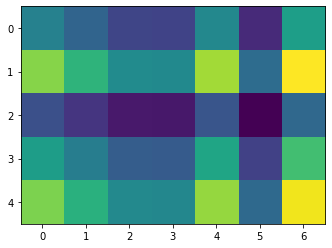

In [152]:
plt.imshow(X.value)

In [153]:
U, sigma, Vt = np.linalg.svd(Y, full_matrices=False)
ones = np.ones_like(sigma)

In [154]:
if sum(sigma) < delta:
    z_star = sigma
else:
    z_star = np.ones_like(sigma)
    for i in range(10):
        ones = np.ones(sum(z_star > 0))
        z_star[z_star > 0] = sigma[z_star > 0] + ones * (
            delta - ones.T @ sigma[z_star > 0]
        ) / sum(ones)
        if (z_star < 0).any():
            z_star[z_star < 0] = 0
        else:
            break

In [155]:
X_star = U @ np.diag(z_star) @ Vt
ones = np.ones(sum(z_star > 0))
sigma[z_star > 0] + ones * (delta - ones.T @ sigma[z_star > 0]) / sum(ones)
z_star

array([0.3, 0. , 0. , 0. , 0. ])

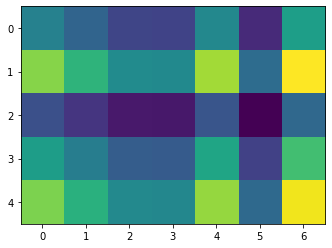

In [156]:
plt.imshow(X_star)